<a href="https://colab.research.google.com/github/Xujjjjun2002/AI/blob/main/Res_inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class BasicConv(nn.Module):
  def __init__(self,in_channels,out_channels,kernel_size,stride=1,padding=0):
    super(BasicConv,self).__init__()
    self.conv = nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=kernel_size,stride=stride,padding=padding)
    self.bn = nn.BatchNorm2d(out_channels)
    self.relu = nn.ReLU(inplace=True)
  def forward(self,x):
    x = self.conv(x)
    x = self.bn(x)
    x = self.relu(x)
    return x

In [ ]:
class StemModel(nn.Module):
  def __init__(self):
    super(StemModel,self).__init__()
    self.conv_1 = BasicConv(3,32,3,2)
    self.conv_2 = BasicConv(32,32,3)
    self.conv_3 = BasicConv(32,64,3,padding=1)
    self.maxpool_4 = nn.MaxPool2d(kernel_size=3,stride=2)
    self.conv_4 = BasicConv(64,96,3,2)
    self.left_6 = nn.Sequential(
      BasicConv(160,64,1),
      BasicConv(64,96,3)
      )
    self.right_6 = nn.Sequential(
        BasicConv(160,64,1),
        BasicConv(64,64,(7,1),padding=(3,0)),
        BasicConv(64,64,(1,7),padding=(0,3)),
        BasicConv(64,96,3)
    )
    self.left_7 = BasicConv(192,192,3,stride=2)
    self.right_7 = nn.MaxPool2d(kernel_size=3,stride=2)

  def forward(self,x):
    x = self.conv_1(x)
    x = self.conv_2(x)
    x = self.conv_3(x)
    x11 = self.maxpool_4(x)
    x12 = self.conv_4(x)
    x = torch.cat([x11,x12],dim=1)
    x21 = self.left_6(x)
    x22 = self.right_6(x)
    x = torch.cat([x21,x22],dim=1)
    x31 = self.left_7(x)
    x32 = self.right_7(x)
    x = torch.cat([x31,x32],dim=1)
    return x

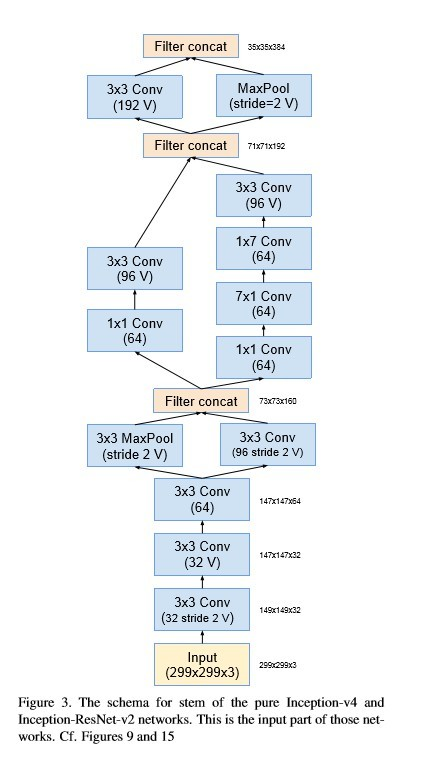